<a href="https://colab.research.google.com/github/surajiiit/F-A-Course/blob/main/WEEK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BINOMIAL PRICING MODEL - AMEICAN OPTIONS**

In [3]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [5]:
symbol = 'SPY'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-16 00:00:00-05:00,603.967249,605.741308,603.179921,604.754578,43695200,0.000,0.0,0.0
2024-12-17 00:00:00-05:00,602.163299,603.139992,600.867672,602.262939,55773500,0.000,0.0,0.0
2024-12-18 00:00:00-05:00,601.953994,604.375836,583.924709,584.313416,108248700,0.000,0.0,0.0
2024-12-19 00:00:00-05:00,589.376338,591.010851,583.884811,584.133972,85919500,0.000,0.0,0.0
2024-12-20 00:00:00-05:00,581.770020,595.750000,580.909973,591.150024,125535900,1.966,0.0,0.0


In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-12-26 00:00:00-05:00,468.065970,470.544160,467.986966,469.625946,55387000,0.0,0.0,0.0
2023-12-27 00:00:00-05:00,469.418642,470.623192,468.875619,470.475098,68000300,0.0,0.0,0.0
2023-12-28 00:00:00-05:00,470.840398,471.501895,470.228255,470.652802,77158100,0.0,0.0,0.0
2023-12-29 00:00:00-05:00,470.455301,470.988470,467.305699,469.290253,122234100,0.0,0.0,0.0
2024-01-02 00:00:00-05:00,466.180186,467.671072,464.531323,466.663971,123623700,0.0,0.0,0.0


In [7]:
symbol = 'SPY'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [8]:
dfo.options  #to get the date of different expiration time

('2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-30',
 '2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [9]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [10]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY241224C00500000,2024-12-19 16:27:33+00:00,500.0,90.83,87.73,91.08,0.0,0.0,NaN,0,1.406741,True,REGULAR,USD
1,SPY241224C00510000,2024-12-19 14:36:24+00:00,510.0,81.95,77.78,80.80,0.0,0.0,NaN,0,1.208988,True,REGULAR,USD
2,SPY241224C00515000,2024-12-20 20:03:26+00:00,515.0,78.00,72.68,75.91,0.0,0.0,1.0,1,1.166752,True,REGULAR,USD
3,SPY241224C00525000,2024-12-19 20:10:41+00:00,525.0,62.79,63.88,65.10,0.0,0.0,NaN,0,0.828127,True,REGULAR,USD
4,SPY241224C00535000,2024-12-19 16:27:27+00:00,535.0,55.82,53.82,55.96,0.0,0.0,NaN,0,0.626957,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [1]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close'] / df['Close'].shift(1))

    # Remove NaN values
    log_return = log_return.dropna()

    # Calculate daily standard deviation (volatility)
    daily_vol = log_return.std()

    # Annualize the daily volatility
    vol = daily_vol * np.sqrt(252)

    return vol

In [11]:
vol = annual_vol(df)
vol

0.12491293422735292

In [12]:
dfo.options[1]

'2024-12-24'

In [13]:
date.today()

datetime.date(2024, 12, 23)

In [16]:
N = 100          #Number of steps
T = 1/365      #Calculate the number of days left for expiry from your calculation in years, change accordingly
t = T/N

In [17]:
u =np.exp(np.sqrt(t)) #your code here#     #Calculate u from the above formula
u

1.005247961787983

In [18]:
d = 1/u #your code here#   #Similarly calculate d
d

0.9947794355348418

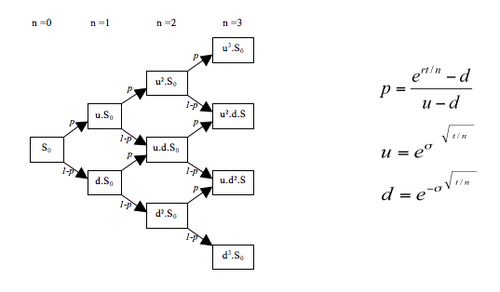

In [19]:
def first_binomial_american(S, K, T, r, u, d, N, option_type):
    """
    Implementation of binomial pricing model for American options.

    Parameters
    ----------
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Expiry time in years
    r : float
        Risk-free rate (annualized, continuous compounding)
    u : float
        Size of up move factor
    d : float
        Size of down move factor
    N : int
        Number of steps in the binomial model
    option_type : char
        'C' for Call, 'P' for Put

    Returns
    -------
    price : float
        Returns the price of the option
    """
    dt = T / N

    # Risk-neutral probabilities
    q = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at each node
    asset_prices = np.zeros((N+1, N+1))
    option_values = np.zeros((N+1, N+1))

    # Calculate asset prices at final time step
    for i in range(N+1):
        asset_prices[i, N] = S * (u ** (N-i)) * (d ** i)

    # Calculate option values at final time step
    for i in range(N+1):
        if option_type == 'C':  # Call option
            option_values[i, N] = max(0, asset_prices[i, N] - K)
        elif option_type == 'P':  # Put option
            option_values[i, N] = max(0, K - asset_prices[i, N])

    # Backward induction for option pricing
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            # Option value at this node considering immediate exercise and continuation
            asset_prices[i, j] = S * (u ** (j-i)) * (d ** i)
            if option_type == 'C':
                option_values[i, j] = max(asset_prices[i, j] - K,
                                           np.exp(-r * dt) * (q * option_values[i, j+1] + (1 - q) * option_values[i+1, j+1]))
            elif option_type == 'P':
                option_values[i, j] = max(K - asset_prices[i, j],
                                           np.exp(-r * dt) * (q * option_values[i, j+1] + (1 - q) * option_values[i+1, j+1]))

    # The option price at time 0
    return option_values[0, 0]

    # your code here

In [20]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call[K] = first_binomial_american(
        S=df['Close'].iloc[-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='C'
    )

th_call = pd.DataFrame.from_dict(call, orient='index', columns=['th_call'])
th_call.head()

,th_call
500.0,91.154582
510.0,81.168798
515.0,76.185802
525.0,66.265178
535.0,56.468675


In [21]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
500.0,90.83
510.0,81.95
515.0,78.00
525.0,62.79
535.0,55.82


In [22]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
500.0,91.154582,90.83
510.0,81.168798,81.95
515.0,76.185802,78.00
525.0,66.265178,62.79
535.0,56.468675,55.82
540.0,51.652926,49.11
560.0,33.494573,31.00
565.0,29.400450,23.73
570.0,25.539225,20.68
571.0,24.789549,20.60


<Axes: >

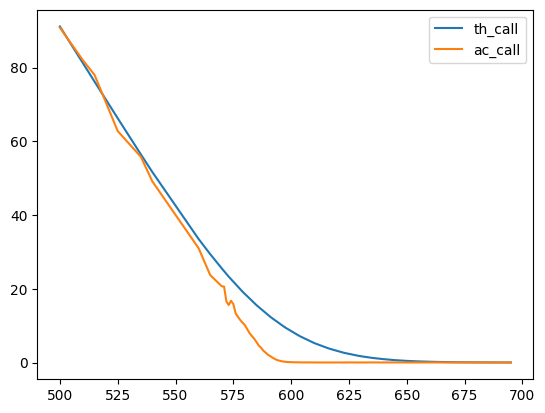

In [23]:
call.plot() #plotting the actual and theoretical option prices

In [24]:
#r is the risk free rate taken from the 10 years us treasury bond
#put price calculated by n step binomial model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = first_binomial_american(
        S=df['Close'][len(df)-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='P'
    )
    put[K] = put_price

th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns={0: "th_put"}, inplace=True)
th_put.head()

,th_put
400.0,4.077196e-15
405.0,3.501692e-14
410.0,3.103778e-13
415.0,2.883688e-12
420.0,2.019782e-11


In [25]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
400.0,0.01
405.0,0.03
410.0,0.03
415.0,0.25
420.0,0.02


In [26]:
put = th_put
put["ac_put"] = ac_put
put.head(10)

,th_put,ac_put
400.0,4.077196e-15,0.01
405.0,3.501692e-14,0.03
410.0,3.103778e-13,0.03
415.0,2.883688e-12,0.25
420.0,2.019782e-11,0.02
425.0,1.198862e-10,0.01
430.0,6.300368e-10,0.05
435.0,2.996901e-09,0.01
440.0,1.307364e-08,0.02
445.0,5.276405e-08,0.01


<Axes: >

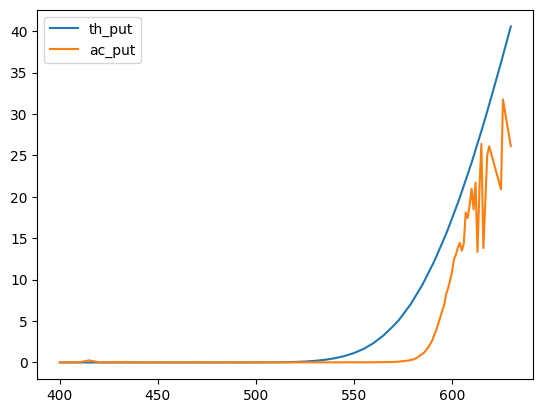

In [27]:
put.plot() #plotting the actual and theoretical option prices